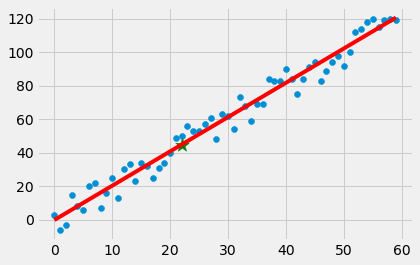

predict(  22 ) :  44.8501065110679
m = 2.0488746874131696 b = -0.225136612021835


In [2]:
# import lib
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
%matplotlib inline
style.use("fivethirtyeight")

# define x-axis ,y-axis
# feature = np.array([1,2,3,4,5,6], dtype=np.float64)
# label = np.array([5,4,6,5,6,7], dtype=np.float64)

# create dataset
def create_dataset(how_much, variance, step=2, correlation=False):
    val = 1
    ys = []
    for _ in range(how_much):
        y = val+random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(ys, dtype = np.float64) , np.array(xs, dtype = np.float64)

# label, feature
label , feature = create_dataset(60 ,10 , 2 , correlation='pos')


# get m,b for best fit line
def best_fit_slop_and_intercept(x , y):
    m = ( 
        ( ( (mean(x)*mean(y)) ) - (mean(x*y)) )
         /( ((mean(x)**2))-(mean(x*x)) )
        )
    b = mean(y) - m*mean(x)
    return m, b

m, b = best_fit_slop_and_intercept(feature , label)
fit_line = [(m*x) + b for x in feature]

# new feature to make test
new_feature = 22
# predicted label
predict_y = m*new_feature + b

plt.scatter(feature ,label)
plt.plot(feature , fit_line , 'r')
plt.scatter(new_feature , predict_y, color="g" , s = 200,marker='*')
plt.show()
print("predict( ",new_feature,") : ",predict_y)
print("m = "+str(m), "b = "+str(b))


### Calculate the accuracy of this model

In [36]:
# calculate the squer error (distance between ys_original and fit_line or
# distance between ys_original and mean line)

def Squered_error(y_original , fit_line):
    return sum((fit_line - y_original)**2)

# calculate the squer r 
def coeffiecient_of_determination(y_original, fit_line):
    # calculate y_mean_line
    y_mean_line = [mean(y_original) for y in y_original]
    # y_mean_line = [5.5, 5.5, 5.5, 5.5, 5.5, 5.5] 
    
    # calculate the squer error for best fit line
    squer_error_best_fit_line = Squered_error(y_original, fit_line)
    squer_error_y_mean_line = Squered_error(y_original , y_mean_line)
    
    return 1 - (squer_error_best_fit_line / squer_error_y_mean_line)

squer_r = coeffiecient_of_determination(y_axis, fit_line)

print(squer_r)

0.9194600788169407
